In [37]:
import pandas as pd
import json
import requests
import numpy as np
from config import weather_api_key
from citipy import citipy
import matplotlib.pyplot as plt

# WeatherPy
----

#### Note
* Bringing Data Files

## Generate Cities List

In [2]:
lat_range = (90, -90)
lon_range = (180, -180)

# Blank list to hold latitude and longitude values
lat_lon = []

# Using numpy to generate random latitude and longitude values
lat = np.random.uniform(high=90, low =-90, size= 1200)
lon = np.random.uniform(high=180, low =-180, size= 1200)
lat_lon = list(zip(lat, lon))

# Using "for" loop to generate city list.
city_list = []

for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

# Appending only non-duplicated names to the city list.
    if city not in city_list:
        city_list.append(city)

In [3]:
len(city_list)

506

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"
parameters = {
    "q": city_list,
    "appid": weather_api_key
}

In [4]:
r = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
        "q": city_list[50],
        "appid": weather_api_key})

In [5]:
data = r.json()
data

{'coord': {'lon': 174.78, 'lat': -41.29},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 285.39,
  'feels_like': 278.1,
  'temp_min': 284.82,
  'temp_max': 286.15,
  'pressure': 1022,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 9.8, 'deg': 350, 'gust': 15.9},
 'clouds': {'all': 0},
 'dt': 1600700919,
 'sys': {'type': 1,
  'id': 7358,
  'country': 'NZ',
  'sunrise': 1600711825,
  'sunset': 1600755418},
 'timezone': 43200,
 'id': 2179537,
 'name': 'Wellington',
 'cod': 200}

In [23]:
def extract_data(data):
    return {
        "City": data["name"],
        "Lat": data["coord"]["lat"],
        "Lon": data["coord"]["lon"],
        "Max Temp": data ["main"]["temp_max"],
        "Humidity": data ["main"]["humidity"],
        "Cloudines": data ["clouds"]["all"],
        "Wind Speed": data ["wind"]["speed"],
        "Country": data["sys"]["country"],
        "Date": data["dt"]
    }
    

In [24]:
city_results = []

In [25]:
# Record counter starts at 1
processing_record = 1

print("Beginning Data Retrieval")
print("----------------------------------------")

for city in city_list:
      
    try:
        data = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
        "q": city,
        "appid": weather_api_key, 
        "units": "imperial"
        }).json()
        
        city_result = extract_data(data)
        city_results.append(city_result)
        
        processing_record += 1
    
        print("Processing Record {processing_record} | {city}")
                            
    except:
        print("City not found. Skipping...")
    continue
    
print("----------------------------------------")
print("Data Retrieval Complete")
print("----------------------------------------")
    

Beginning Data Retrieval
----------------------------------------
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
City not found. Skipping...
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Re

In [28]:
df = pd.DataFrame(city_results)
df.head(2)

,City,Lat,Lon,Max Temp,Humidity,Cloudines,Wind Speed,Country,Date
0,Vanimo,-2.67,141.30,78.04,86,15,4.7,PG,1600703494
1,Bluff,-46.60,168.33,54.00,61,100,13.0,NZ,1600703494


### Creating Scatter Plot to showcase the relation ship between Max Temperature and Latitude

In [41]:
# Converting data in DataFrame so that it can be used to define the X and y value needed for the scatter plot.
X = df["Lat"].values
y = df["Max Temp"].values

<function matplotlib.pyplot.show(close=None, block=None)>

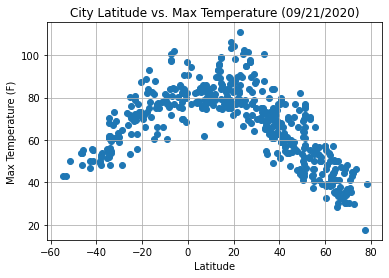

In [42]:
plt.title("City Latitude vs. Max Temperature (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X,y)
plt.show

### Creating Scatter Plot to showcase the relation ship between Humidity and Latitude 

In [43]:
X = df["Lat"].values
y = df["Max Temp"].values